# PCA on market dataset

# Customer Behavior Segmentation for Retail Optimization
    You are working as a Data Scientist in an e-commerce company.
    The company has collected detailed customer behavior data, including:
    Annual Income
    Spending Score
    Purchase Frequency
    Average Basket Value
    Website Visit Time
    Discount Usage Rate
    Product Category Preferences
    Return Rate
    The dataset contains multiple numerical features, making it difficult to:
    Visualize customer groups
    Train clustering models efficiently
    Understand key behavioral patterns
    Dataset Name:

    Customer Personality Analysis
    🔗 https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
    Customer Personality Analysis | Kaggle
    Analysis of company's ideal customers
 
## 🔹 Part 1 – Data Preparation
    Load the dataset.
    Select only numerical features relevant to customer behavior.
    Handle missing values.
    Standardize the data.
## 🔹 Part 2 – PCA Implementation
    Apply PCA on the standardized dataset.
    Plot the explained variance ratio.
    Determine:
    How many principal components are needed to retain at least 90% of total variance?
    Reduce the dataset to those components.
## 🔹 Part 3 – Interpretation
    Identify:
    Which original features contribute most to PC1?
    Which features dominate PC2?
    Explain what PC1 and PC2 represent in business terms.
## 🔹 Part 4 – Practical Application
    Visualize customers in 2D PCA space.
    Now apply K-Means clustering on:
    Original dataset
    PCA-reduced dataset
    Compare:
    Silhouette score
    Computation time
    Cluster separation quality

## Importing the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA_sklearn

## loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\KIRAN\OneDrive\Desktop\CSV Files\marketing_campaign.csv', sep='\t')

## Data insception

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 29)

# 🔹 Part 1 – Data Preparation

## Checking for null values

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## handling the null values

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# chosing only numerical features for PCA
df = df.select_dtypes(include=[np.number])

In [11]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [15]:
len(df.columns)

26

In [16]:
# Select only numerical features relevant to customer behavior.
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'NumWebVisitsMonth']
len(numerical_features)

13

In [17]:
df = df[numerical_features]

## Checking for outliers

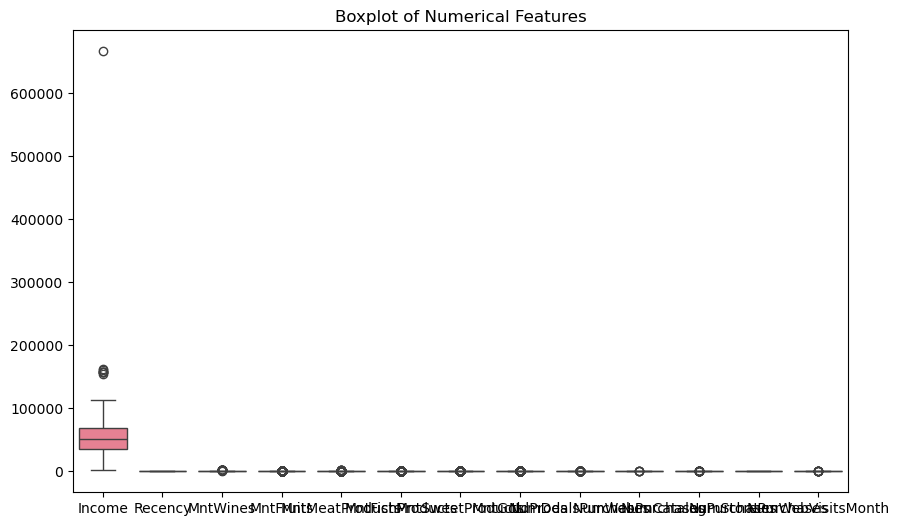

In [18]:
# outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Boxplot of Numerical Features')
plt.show()

Outliers % | Dataset Size | Action
-----------|--------------|--------
< 5%       | Any          | ✅ REMOVE
5–10%      | Large (>1000)| ✅ Winsorize
5–10%      | Small (<500) | ⚠️  Transform/Keep
10–20%     | Any          | ✅ Robust Scaling
> 20%      | Any          | 🔍 Investigate data generation


In [ ]:
# checking for outlier in the data frame using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print((outliers/len(df))*100)

Number of outliers in each column:
Income                  0.357143
Recency                 0.000000
MntWines                1.562500
MntFruits              10.133929
MntMeatProducts         7.812500
MntFishProducts         9.955357
MntSweetProducts       11.071429
MntGoldProds            9.241071
NumDealsPurchases       3.839286
NumWebPurchases         0.178571
NumCatalogPurchases     1.026786
NumStorePurchases       0.000000
NumWebVisitsMonth       0.357143
dtype: float64


In [21]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming your df is already loaded
# df = pd.read_csv('your_file.csv')

# Step 1: Detect outliers (your existing code)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_pct = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() / len(df) * 100

print("Outlier % per column:")
print(outliers_pct.sort_values(ascending=False))
print()

# Step 2: Define strategy per column based on %
remove_cols = outliers_pct[outliers_pct < 5].index.tolist()      # <5%: Remove rows
winsorize_cols = outliers_pct[(outliers_pct >= 5) & (outliers_pct < 10)].index.tolist()  # 5-10%: Winsorize
robust_cols = outliers_pct[outliers_pct >= 10].index.tolist()    # >10%: Robust scale

print("Strategy:")
print(f"Remove rows (<5%): {remove_cols}")
print(f"Winsorize (5-10%): {winsorize_cols}")
print(f"Robust scale (>10%): {robust_cols}")
print()

# Step 3: Apply strategy column-by-column
df_processed = df.copy()

# 3a: Remove rows with outliers in <5% columns
remove_mask = ((df[remove_cols] < (Q1[remove_cols] - 1.5*IQR[remove_cols])) | 
               (df[remove_cols] > (Q1[remove_cols] + 1.5*IQR[remove_cols]))).any(axis=1)
df_processed = df_processed[~remove_mask]
print(f"Rows after removal: {len(df_processed)} (removed {len(df) - len(df_processed)})")

# 3b: Winsorize 5-10% columns (cap at 5th/95th percentiles)
for col in winsorize_cols:
    df_processed[col] = winsorize(df_processed[col], limits=[0.05, 0.05])

# 3c: Robust scale >10% columns
scaler = RobustScaler()
df_processed[robust_cols] = scaler.fit_transform(df_processed[robust_cols])

# 4: Standard scale remaining columns (clean ones)
clean_cols = [col for col in df.columns if col not in remove_cols + winsorize_cols + robust_cols]
scaler_std = StandardScaler()
if clean_cols:
    df_processed[clean_cols] = scaler_std.fit_transform(df_processed[clean_cols])

print("\n✅ All outliers handled!")
print("Final shape:", df_processed.shape)
print("\nProcessed data preview:")
print(df_processed.head())

Outlier % per column:
MntSweetProducts       11.071429
MntFruits              10.133929
MntFishProducts         9.955357
MntGoldProds            9.241071
MntMeatProducts         7.812500
NumDealsPurchases       3.839286
MntWines                1.562500
NumCatalogPurchases     1.026786
Income                  0.357143
NumWebVisitsMonth       0.357143
NumWebPurchases         0.178571
Recency                 0.000000
NumStorePurchases       0.000000
dtype: float64

Strategy:
Remove rows (<5%): ['Income', 'Recency', 'MntWines', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Winsorize (5-10%): ['MntMeatProducts', 'MntFishProducts', 'MntGoldProds']
Robust scale (>10%): ['MntFruits', 'MntSweetProducts']

Rows after removal: 1384 (removed 856)

✅ All outliers handled!
Final shape: (1384, 13)

Processed data preview:
    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1  46344.0       38        11  -0.250000    

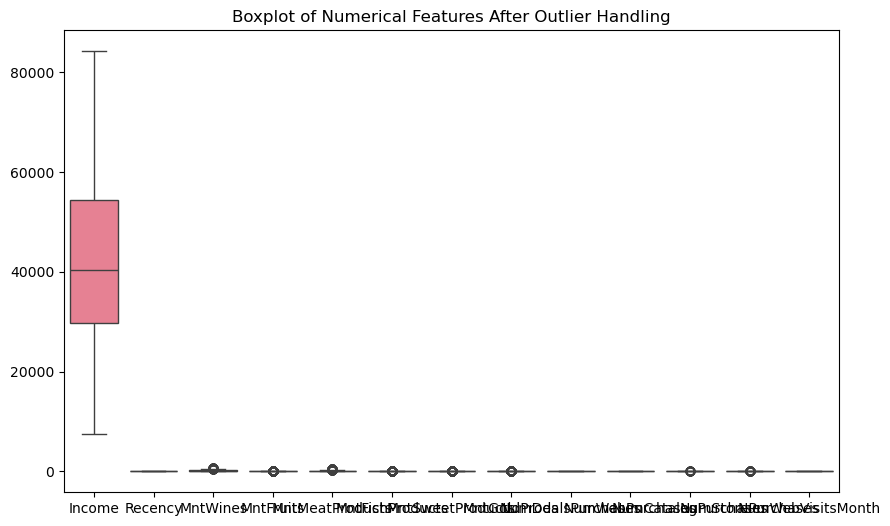

In [22]:
# checking for outliers using boxplot after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(df_processed)
plt.title('Boxplot of Numerical Features After Outlier Handling')
plt.show()

In [23]:
df = df_processed

In [24]:
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1,46344.0,38,11,-0.250000,6,2,-0.230769,6,2,1,1,2,5
2,71613.0,26,426,3.750000,127,110,1.307692,42,1,8,2,10,4
3,26646.0,26,11,0.000000,20,10,-0.076923,5,2,2,0,4,6
5,62513.0,16,520,3.166667,98,0,2.923077,14,2,6,4,10,6
6,55635.0,34,235,5.083333,164,50,3.461538,27,4,7,3,7,6


# 🔹 Part 2 – PCA Implementation